In [7]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
# Configuração para exibição dos gráficos
%matplotlib inline

# 1.1 Criação/Importação da Base de Dados
# Como não tenho acesso ao link externo, criei um DataFrame simulando os dados da imagem do PDF
data = {
    'Nome ação': ['SUZB3', 'VALE3', 'GOOGLE', 'AMAZON', 'APPLE', 'ELEKTRO', 'PETR4', 'ITUB4', 'BBDC4', 'WEGE3', 'MGLU3', 'VIIA3'],
    'Preço ação R$': [55.0, 68.0, 120.0, 115.0, 180.0, 35.0, 30.0, 25.0, 20.0, 40.0, 3.5, 2.8],
    'Qtde de cotas': [208, 253, 35, 43, 19, 150, 500, 400, 450, 100, 1000, 800],
    'Valor de mercado R$ -(Bilhões)': [78, 326, 1980, 1866, 2300, 40, 350, 250, 180, 160, 15, 8]
}

df = pd.DataFrame(data)

# Exibindo as primeiras linhas para conferência
display(df.head())

,Nome ação,Preço ação R$,Qtde de cotas,Valor de mercado R$ -(Bilhões)
0,SUZB3,55.0,208,78
1,VALE3,68.0,253,326
2,GOOGLE,120.0,35,1980
3,AMAZON,115.0,43,1866
4,APPLE,180.0,19,2300


In [ ]:
# 2.1 Informações gerais do dataset
print("Informações do Dataset:")
df.info()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nome ação                       12 non-null     object 
 1   Preço ação R$                   12 non-null     float64
 2   Qtde de cotas                   12 non-null     int64  
 3   Valor de mercado R$ -(Bilhões)  12 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 516.0+ bytes

Estatísticas Descritivas:


,Preço ação R$,Qtde de cotas,Valor de mercado R$ -(Bilhões)
count,12.000000,12.000000,12.000000
mean,57.858333,329.833333,629.416667
std,54.165612,314.819958,868.416580
min,2.800000,19.000000,8.000000
25%,23.750000,85.750000,68.500000
50%,37.500000,230.500000,215.000000
75%,79.750000,462.500000,729.000000
max,180.000000,1000.000000,2300.000000


In [10]:
# 2.2 Estatísticas descritivas
print("\nEstatísticas Descritivas:")
display(df.describe())


Estatísticas Descritivas:


,Preço ação R$,Qtde de cotas,Valor de mercado R$ -(Bilhões)
count,12.000000,12.000000,12.000000
mean,57.858333,329.833333,629.416667
std,54.165612,314.819958,868.416580
min,2.800000,19.000000,8.000000
25%,23.750000,85.750000,68.500000
50%,37.500000,230.500000,215.000000
75%,79.750000,462.500000,729.000000
max,180.000000,1000.000000,2300.000000


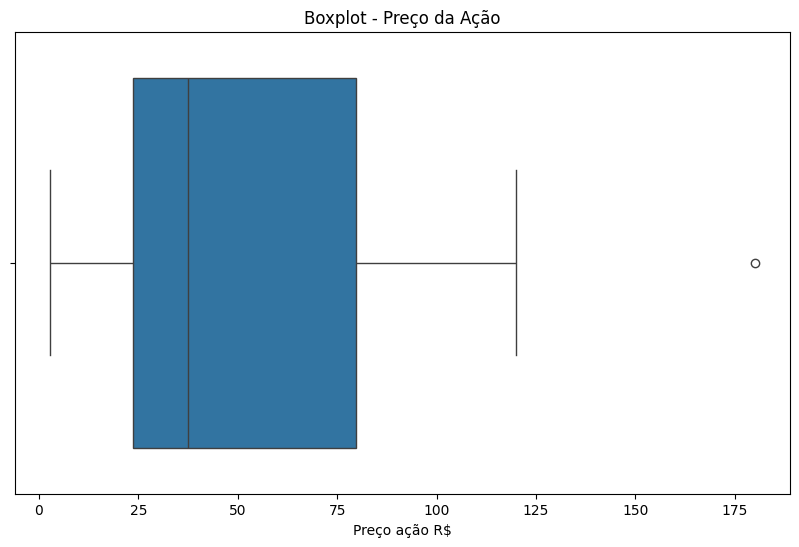

In [11]:
# 2.3 Verificação de Outliers - Preço da Ação
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Preço ação R$'])
plt.title('Boxplot - Preço da Ação')
plt.show()

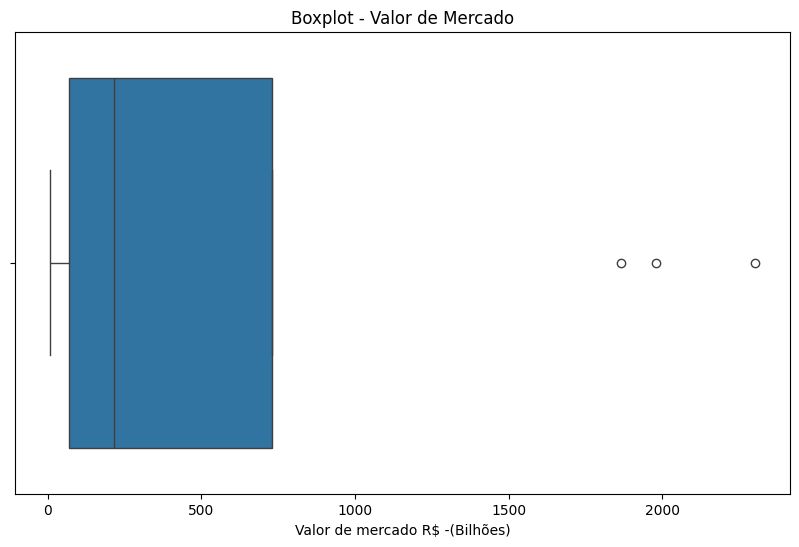

In [12]:
# 2.4 Verificação de Outliers - Valor de Mercado
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Valor de mercado R$ -(Bilhões)'])
plt.title('Boxplot - Valor de Mercado')
plt.show()

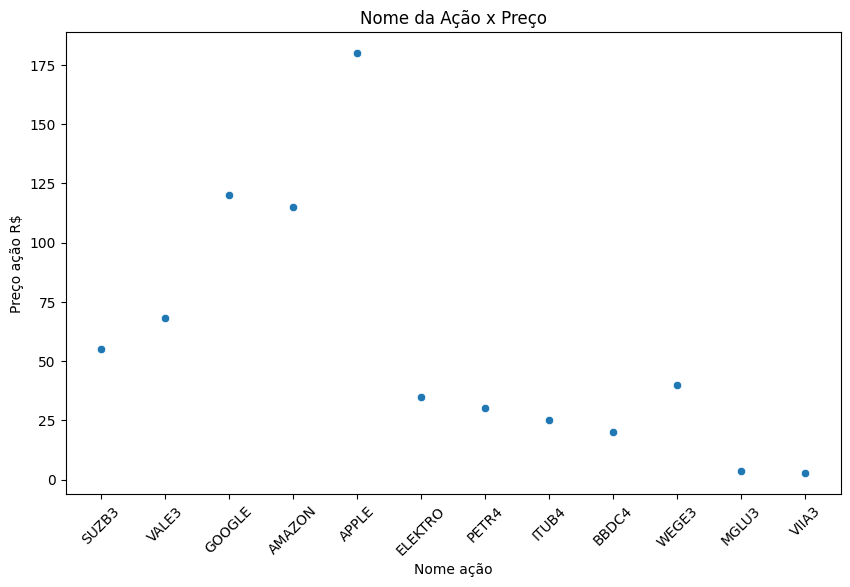

In [13]:
# 2.5 Gráfico de Dispersão: Preço vs Valor de Mercado (Similar ao esboço do PDF)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Nome ação', y='Preço ação R$')
plt.title('Nome da Ação x Preço')
plt.xticks(rotation=45)
plt.show()

In [15]:
# 3.1 Tratamento de variáveis categóricas (One-Hot Encoding)
# Conforme solicitado: transformar 'Nome ação' em colunas True/False (0 ou 1)
df_encoded = pd.get_dummies(df, columns=['Nome ação'], drop_first=True)

# Visualizando o resultado da codificação
display(df_encoded.head())

# NOTA: Para o K-Means, é altamente recomendável escalar os dados numéricos,
# pois a distância euclidiana é sensível à escala (Bilhões vs Unidades).
# Vamos selecionar as colunas numéricas originais para o agrupamento + as dummies se necessário,
# mas geralmente agrupa-se pelas características numéricas (Preço, Cotas, Valor).

# Selecionando features para o modelo
X = df[['Preço ação R$', 'Qtde de cotas', 'Valor de mercado R$ -(Bilhões)']]

# Padronização (StandardScaler) - Prática recomendada em IA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,Preço ação R$,Qtde de cotas,Valor de mercado R$ -(Bilhões),Nome ação_APPLE,Nome ação_BBDC4,Nome ação_ELEKTRO,Nome ação_GOOGLE,Nome ação_ITUB4,Nome ação_MGLU3,Nome ação_PETR4,Nome ação_SUZB3,Nome ação_VALE3,Nome ação_VIIA3,Nome ação_WEGE3
0,55.0,208,78,False,False,False,False,False,False,False,True,False,False,False
1,68.0,253,326,False,False,False,False,False,False,False,False,True,False,False
2,120.0,35,1980,False,False,False,True,False,False,False,False,False,False,False
3,115.0,43,1866,False,False,False,False,False,False,False,False,False,False,False
4,180.0,19,2300,True,False,False,False,False,False,False,False,False,False,False


In [16]:
# 4.1 K-Means com 4 Clusters
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster_4'] = kmeans4.fit_predict(X_scaled)

print("Centróides para k=4:")
print(kmeans4.cluster_centers_)

# 4.2 Alterar para 5 Clusters
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster_5'] = kmeans5.fit_predict(X_scaled)

# 4.3 Alterar para 8 Clusters
kmeans8 = KMeans(n_clusters=8, random_state=42, n_init=10)
df['Cluster_8'] = kmeans8.fit_predict(X_scaled)

# Verificando a distribuição
print("\nDistribuição dos grupos (k=4):")
print(df['Cluster_4'].value_counts())

Centróides para k=4:
[[-0.16117227 -0.50456096 -0.57540347]
 [ 1.55178521 -0.98700418  1.70696681]
 [-0.63360144  0.39867228 -0.44430649]
 [-1.05493113  1.89161978 -0.74318354]]

Distribuição dos grupos (k=4):
Cluster_4
0    4
1    3
2    3
3    2
Name: count, dtype: int64


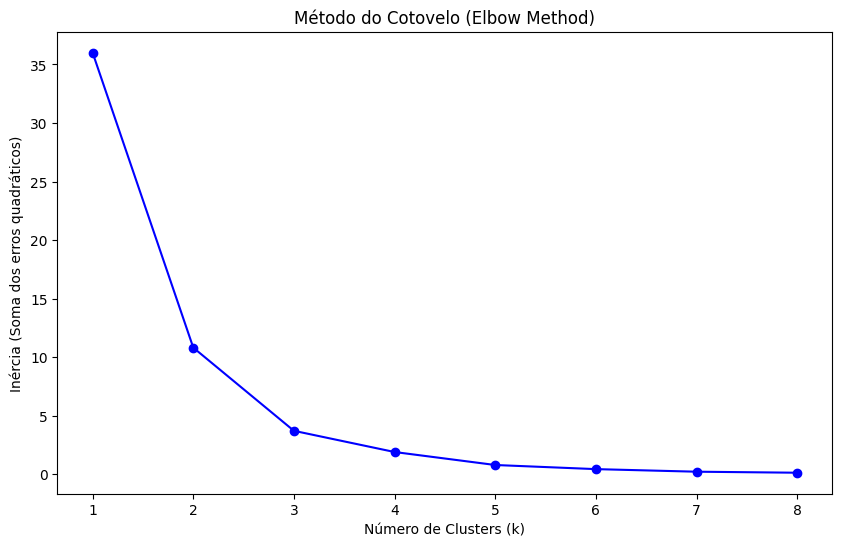

Silhouette Score para k=4: 0.6212


In [17]:
# 5.1 Método do Cotovelo (Elbow Method)
inertia = []
K_range = range(1, 9) # Variando de 1 a 8 clusters conforme pedido

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos erros quadráticos)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.show()

# 5.2 Gráfico da Silhueta (para k=4, que foi o inicial pedido)
# A silhueta varia de -1 a 1. Quanto maior, melhor a definição dos clusters.
score = silhouette_score(X_scaled, kmeans4.labels_)
print(f"Silhouette Score para k=4: {score:.4f}")

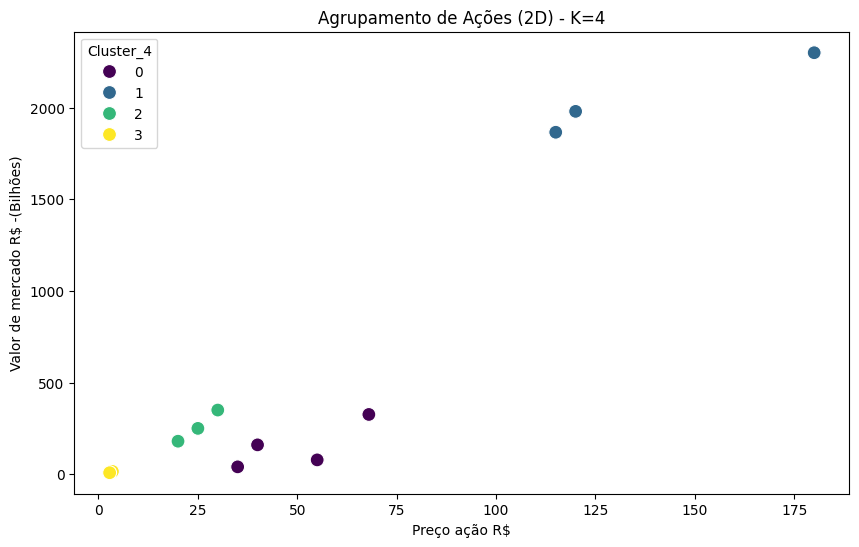

In [19]:
# 6.1 Visualização 2D (Preço vs Valor de Mercado) colorindo pelos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preço ação R$', y='Valor de mercado R$ -(Bilhões)',
                hue='Cluster_4', palette='viridis', s=100)
plt.title('Agrupamento de Ações (2D) - K=4')
plt.show()

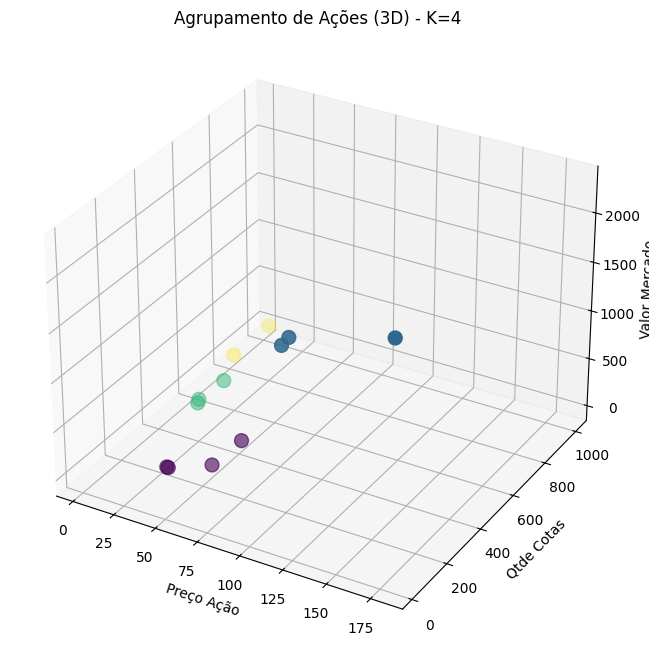

In [20]:
# 6.2 Visualização 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Eixos: Preço, Cotas e Valor de Mercado
img = ax.scatter(df['Preço ação R$'],
                 df['Qtde de cotas'],
                 df['Valor de mercado R$ -(Bilhões)'],
                 c=df['Cluster_4'], cmap='viridis', s=100)

ax.set_xlabel('Preço Ação')
ax.set_ylabel('Qtde Cotas')
ax.set_zlabel('Valor Mercado')
plt.title('Agrupamento de Ações (3D) - K=4')
plt.show()

In [ ]:
# Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

"""
A maior vantagem do aprendizado não supervisionado é que ele consegue revelar padrões e relações escondidas em conjuntos de dados que não têm rótulos. 
Diferentemente do aprendizado supervisionado, que depende de exemplos já classificados para treinar, o não supervisionado pode ser usado mesmo quando não sabemos
de antemão a categoria de cada item. Isso o torna especialmente útil em tarefas como segmentar clientes, detectar comportamentos fora do comum ou agrupar ativos financeiros, 
evitando o trabalho e o custo de rotular tudo manualmente.
"""